In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
actions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
rng = np.random.default_rng(4321)

In [4]:
avg_payouts = rng.normal(0, 0.5, size=10)
payout_dist = [norm(loc = avg_payouts[a], scale=1) for a in actions]

In [5]:
avg_payouts

array([-0.0152053 ,  0.2813863 , -0.11279354,  0.63802206,  0.42720597,
       -0.70409973, -0.00247802, -0.02643345,  0.06019037,  0.29441983])

In [6]:
av = np.argmax(avg_payouts)
av

3

In [7]:
payout_dist[8].rvs()

-1.1437979454314156

In [8]:
payout = []
for k in range(10):
    reward =  payout_dist[k].rvs()
    payout.append(reward)

In [9]:
payout

[0.8928232737194448,
 0.07807936333935533,
 0.18477594464887234,
 1.1737090397850258,
 -1.3696301999282443,
 -2.3167418678961256,
 0.8264057620353925,
 -2.266447002150784,
 -0.8512108915750428,
 0.2954030856185793]

In [10]:
top_machine = np.argmax(payout)
top_machine

3

In [11]:
def win_loss(a):
    return payout_dist[a].rvs()

In [12]:
win_loss(3)

-1.4123023773037442

## Greedy

In [13]:

a_init = np.random.choice(actions) #random machine to start
print(a_init)
R = np.zeros(10)    #initialize rewards to 0s
action_taken = [a_init]
num_actions = np.zeros(10) #initialize the number of times each action has been played
Q = np.zeros(10) #initialize action-rewards to 0
num_actions[a_init] += 1 #we play action a_init
R[a_init] += win_loss(a_init) #this is the first reward
total_reward = R[a_init]
Q[a_init] = R[a_init]
avg_reward_greedy = [R[a_init]]
for t in range(1,10000):#play 10000 times
    a = np.random.choice(np.where(Q == np.max(Q))[0]) #always choose the action with the highest Q value
    reward = win_loss(a)
    R[a] += reward 
    num_actions[a] += 1
    action_taken.append(a)
    Q[a] = R[a]/num_actions[a]  #average Q-value
    total_reward+=reward
    avg_reward_greedy.append(total_reward/t) #the average reward per play

        
    

9


In [14]:
Q

array([ 0.        , -0.07595532, -0.20494157, -0.49014474,  0.4145482 ,
       -1.45447812,  0.        ,  0.        , -0.04480941, -0.01181202])

In [15]:
avg_payouts

array([-0.0152053 ,  0.2813863 , -0.11279354,  0.63802206,  0.42720597,
       -0.70409973, -0.00247802, -0.02643345,  0.06019037,  0.29441983])

In [16]:
num_actions

array([0.000e+00, 1.000e+01, 4.000e+00, 1.000e+00, 9.977e+03, 1.000e+00,
       0.000e+00, 0.000e+00, 6.000e+00, 1.000e+00])

<BarContainer object of 10 artists>

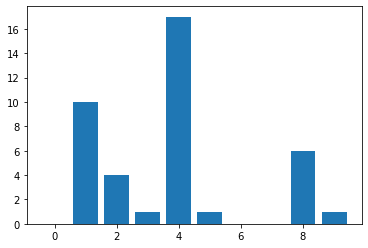

In [17]:
plt.bar(list(range(10)),height=[len(np.where(np.array(action_taken[:40]) == i)[0]) for i in range(10)])

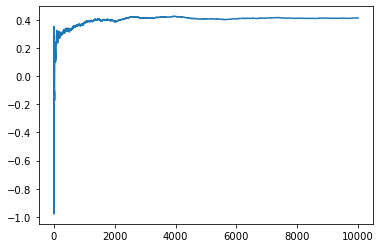

In [18]:
plt.plot(avg_reward_greedy);

## $\varepsilon$-Greedy

In [19]:
eps = 0.1 #probability of exploring a random action
a_init = rng.choice(actions) #random machine to start
action_taken = [a_init]
R = np.zeros(10)    #initialize rewards to 0s
num_actions = np.zeros(10) #initialize the number of times each action has been played
Q = np.zeros(10) #initialize action-rewards to 0
num_actions[a_init] += 1
R[a_init] += win_loss(a_init)
total_reward_r = R[a_init]
avg_reward_eps_greedy = [R[a_init]]
for t in range(1,10000):
    p = rng.random()
    if p < eps:
        a = rng.choice(actions) #choose a random action
    else:
        a = rng.choice(np.where(Q == np.max(Q))[0])  #greedy choice
    reward = win_loss(a)
    R[a] += reward
    total_reward_r+=reward
    action_taken.append(a)
    num_actions[a] += 1
    Q[a] = R[a]/num_actions[a]
    avg_reward_eps_greedy.append(total_reward_r/t)



In [20]:
num_actions

array([  73.,  104.,  126., 9075.,  118.,  100.,  108.,  109.,   90.,
         97.])

In [21]:
Q

array([-0.08187867,  0.27560403, -0.08536237,  0.65390621,  0.40618524,
       -0.49080767,  0.0247153 , -0.10634323,  0.05427578,  0.2295243 ])

In [22]:
avg_payouts

array([-0.0152053 ,  0.2813863 , -0.11279354,  0.63802206,  0.42720597,
       -0.70409973, -0.00247802, -0.02643345,  0.06019037,  0.29441983])

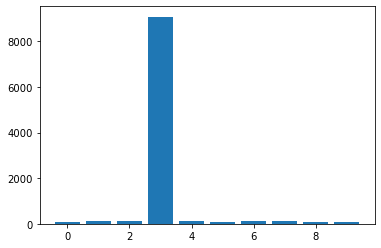

In [23]:
plt.bar(list(range(10)),height=num_actions);

<BarContainer object of 10 artists>

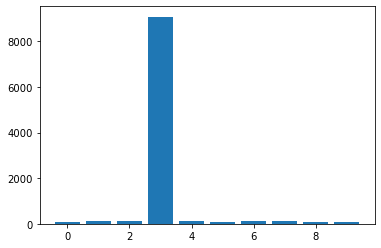

In [24]:
plt.bar(list(range(10)),height=[len(np.where(np.array(action_taken[:15000]) == i)[0]) for i in range(10)])

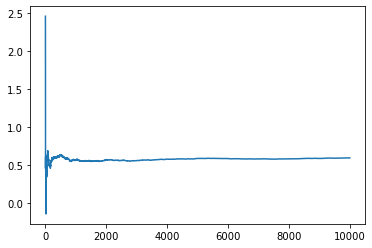

In [25]:
plt.plot(avg_reward_eps_greedy);

## UCB-Greedy

In [ ]:
eps = 0.1 #probability of exploring a random action
a_init = rng.choice(actions) #random machine to start
print(a_init)
action_taken = [a_init]
R = np.zeros(10)    #initialize rewards to 0s
num_actions = np.zeros(10) #initialize the number of times each action has been played
Q = np.zeros(10) #initialize action-rewards to 0
num_actions[a_init] += 1
R[a_init] += win_loss(a_init)
total_reward_ucb = [R[a_init]]
avg_reward_ucb = []
c = 3

for t in range(1,10000):

    p = rng.random()
    if p < eps:
        increments = np.array([c*np.sqrt(np.log(t)/num_actions[a])\
                               if (num_actions[a]> 0)  else 0 for a in actions]) 
                            
        M = Q + increments
        a = rng.choice(np.where(M == np.max(M))[0])          
    else:
        a = rng.choice(np.where(Q == np.max(Q))[0])   #greedy choice
    reward =  win_loss(a)   
    R[a] += reward
    total_reward_ucb += reward
    action_taken.append(a)
    num_actions[a] += 1
    Q[a] = R[a]/num_actions[a]
    avg_reward_ucb.append(total_reward_ucb/t)


In [ ]:
Q

In [ ]:
avg_payouts

In [ ]:
plt.bar(list(range(10)),height=num_actions);

## Policy Gradient

In [26]:
def softmax(x:np.array):
    denominator = np.exp(x).sum()
    return np.exp(x)/denominator

In [35]:
def indicator(a,b):
      return (1 if a == b else 0)
    
Q = np.zeros(10)
z = np.zeros(10)
action_taken = []
num_actions = np.zeros(10)
R = np.zeros(10)
probs=[]
total_reward = 0
avg_reward_pol_grad=[]
for t in range(1,10000):
    pi = softmax(z)
    probs.append(pi)
    a = rng.choice(actions,p=pi)
    action_taken.append(a)
    reward = win_loss(a)
    R[a] += reward
    num_actions[a] += 1
    Q[a] = R[a]/num_actions[a]
    total_reward += reward
    for b in actions:
        z[b] = z[b] + 0.1*(indicator(a,b)-pi[a])*(reward - total_reward/t)
        
    avg_reward_pol_grad.append(total_reward/t)
    

In [36]:
Q

array([ 0.17726928,  0.43028368, -0.00905768,  0.63146677,  0.17854959,
       -0.88294946, -0.3257733 , -0.22765736,  0.328825  ,  0.36247012])

In [37]:
avg_payouts

array([-0.0152053 ,  0.2813863 , -0.11279354,  0.63802206,  0.42720597,
       -0.70409973, -0.00247802, -0.02643345,  0.06019037,  0.29441983])

In [38]:
z

array([-22.31805426, -21.80916481, -22.76446896,   2.50067227,
       -22.38444286, -23.47979047, -22.9166163 , -22.84228021,
       -21.97219899, -21.88802728])

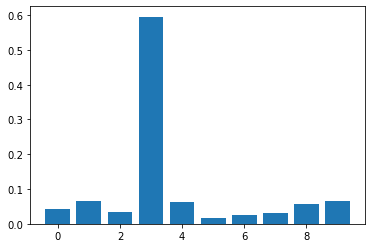

In [39]:
plt.bar(list(range(10)),height=probs[200]);

<BarContainer object of 10 artists>

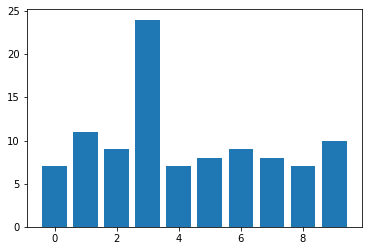

In [40]:
plt.bar(list(range(10)),height=[len(np.where(np.array(action_taken[:100]) == i)[0]) for i in range(10)])

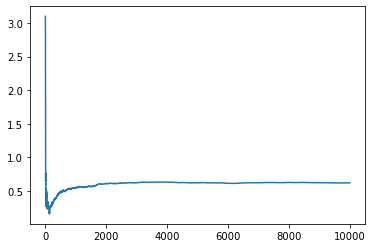

In [41]:
plt.plot(avg_reward_pol_grad);

In [42]:
probs[300]

array([0.00597005, 0.0116837 , 0.00493449, 0.94115928, 0.00667186,
       0.00223123, 0.00391856, 0.00422095, 0.01007586, 0.00913402])

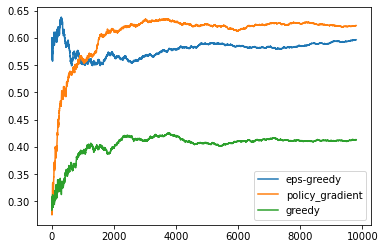

In [43]:
# plt.plot(avg_reward_ucb[100:],label = 'ucb');
plt.plot(avg_reward_eps_greedy[200:],label = 'eps-greedy');
plt.plot(avg_reward_pol_grad[200:],label = 'policy_gradient');
plt.plot(avg_reward_greedy[200:],label='greedy');
plt.legend();